<b> Problem Explained </b>

This is the second part of a Power Consumption problem tha were previously analysed <a href="https://github.com/ffmc/data-analytics-portfolio/blob/master/Classification/Predicting%20which%20brand%20customer%20prefer.ipynb">here.</a>
On this second part we will be using a regression for prediction to understand how the power consumption will be in the future. For this will be checking the time series trend, and by knowing this we can forecast the trend. 

The data is the same we used on Power Consumption Visualization and Analysis.

In [7]:
#Loading Libraries
library(forecast)

In [28]:
## Create TS object with SubMeter1
tsSM3_070809weekly <- ts(house070809weekly$Sub_metering_3, 
                         frequency=52, start=c(2007,1))
fitSM3 <- tslm(tsSM3_070809weekly ~ trend + season) 
summary(fitSM3)


Call:
tslm(formula = tsSM3_070809weekly ~ trend + season)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.3333  -5.9097  -0.3333   5.7570  18.3333 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  7.84993    4.68028   1.677   0.0965 .
trend        0.01456    0.01670   0.872   0.3853  
season2      8.36395    6.87213   1.217   0.2263  
season3     -2.98394    6.87113  -0.434   0.6650  
season4     -2.99850    6.87018  -0.436   0.6634  
season5     -3.01306    6.86927  -0.439   0.6618  
season6     -2.69428    6.86839  -0.392   0.6957  
season7      2.95782    6.86756   0.431   0.6676  
season8      2.60993    6.86677   0.380   0.7047  
season9     -8.73796    6.86602  -1.273   0.2060  
season10    -3.08585    6.86531  -0.449   0.6540  
season11    -2.76707    6.86464  -0.403   0.6877  
season12    -3.11497    6.86401  -0.454   0.6509  
season13    -2.79619    6.86342  -0.407   0.6845  
season14     2.52259    6.86287   0.368   0.7139  
season

In [29]:
## Create the forecast for sub-meter 3. Forecast ahead 20 time periods 
forecastfitSM3 <- forecast(fitSM3, h=20)

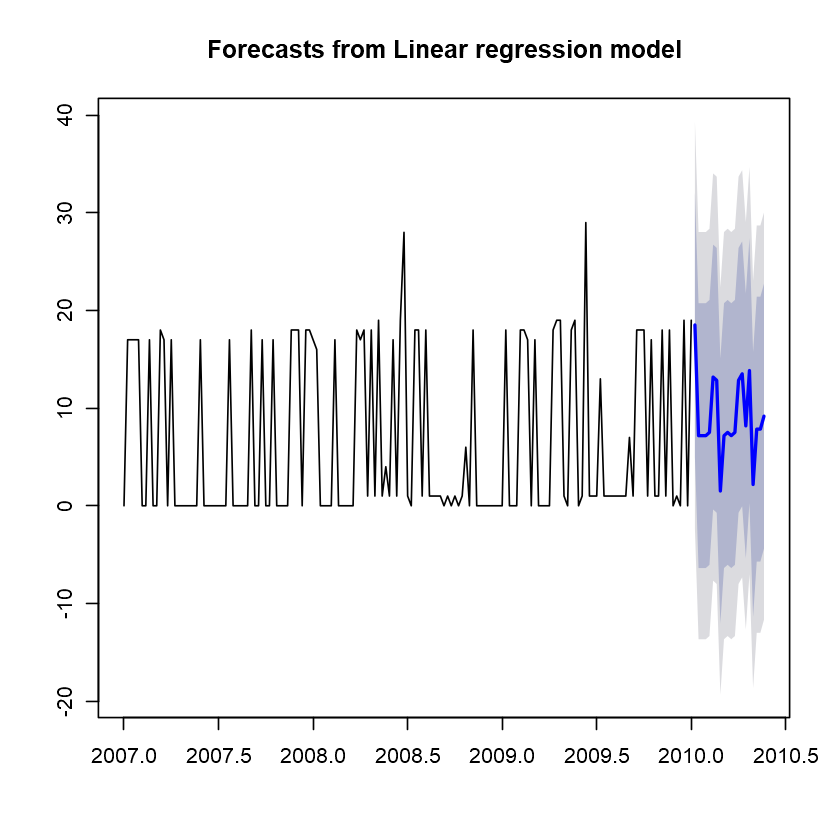

In [30]:
## Plot the forecast for sub-meter 3. 
plot(forecastfitSM3)

         Length Class  Mode     
x        157    ts     numeric  
seasonal 157    ts     numeric  
trend    157    ts     numeric  
random   157    ts     numeric  
figure    52    -none- numeric  
type       1    -none- character

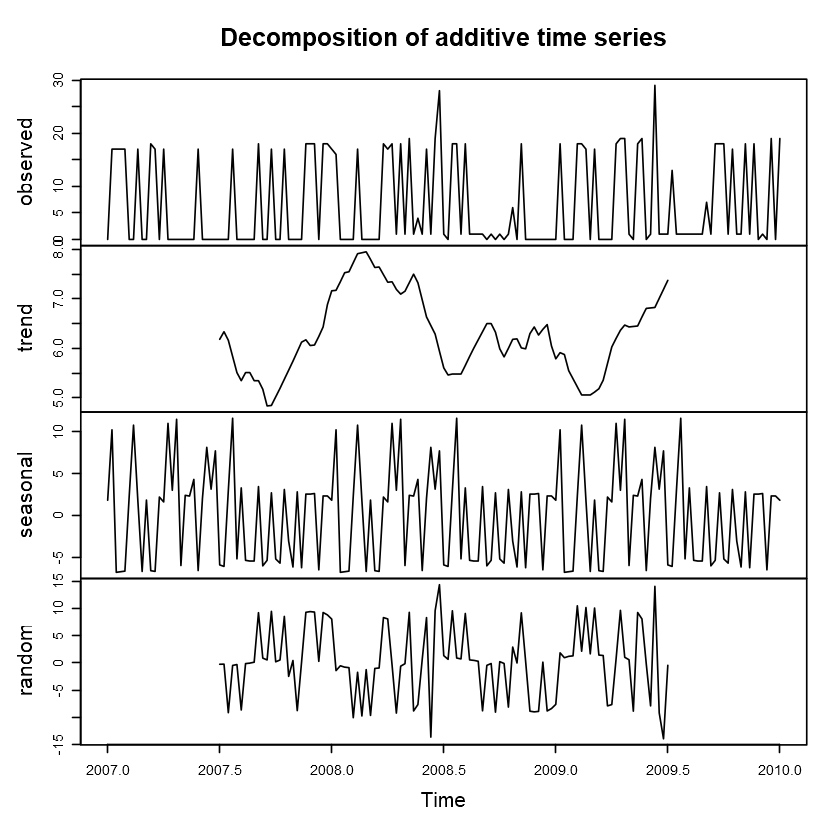

In [31]:
## Decompose Sub-meter 3 into trend, seasonal and remainder
components070809SM3weekly <- decompose(tsSM3_070809weekly)
## Plot decomposed sub-meter 3 
plot(components070809SM3weekly)
## Check summary statistics for decomposed sub-meter 3 
summary(components070809SM3weekly)

Now we proceesd to a simple exponential smoothing using the HoltWinters function. This will allow us to proceed the forecasting. First we have to remove the seasonal components. 

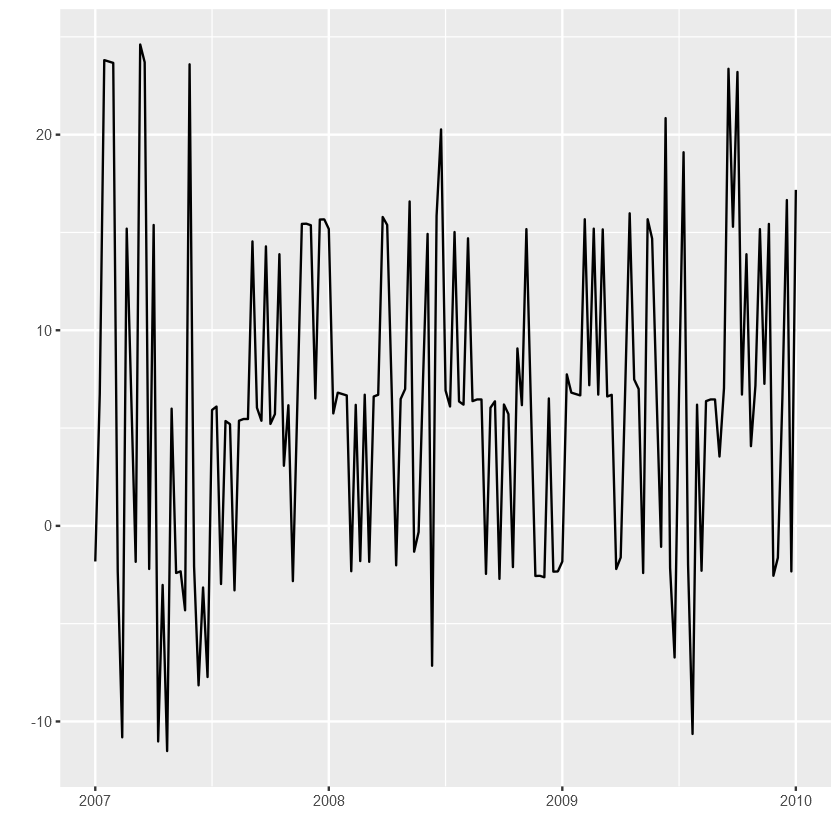

In [33]:
## Seasonal adjusting sub-meter 3 by subtracting the seasonal component & plot
tsSM3_070809Adjusted <- tsSM3_070809weekly - components070809SM3weekly$seasonal
autoplot(tsSM3_070809Adjusted)

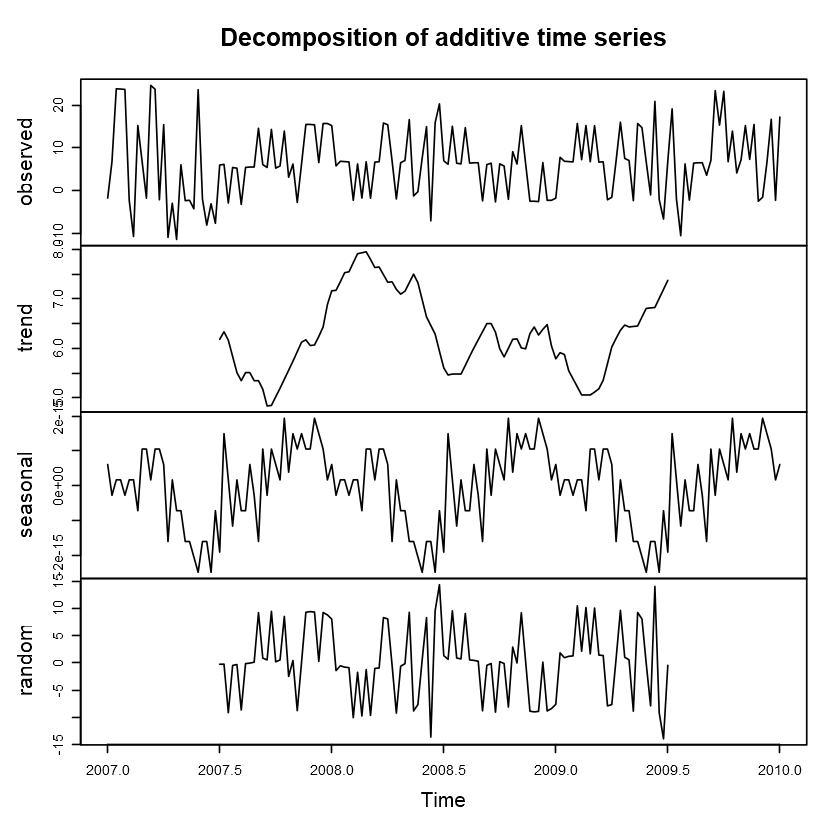

In [34]:
## Test Seasonal Adjustment by running Decompose again. Note the very, very small scale for Seasonal
plot(decompose(tsSM3_070809Adjusted))

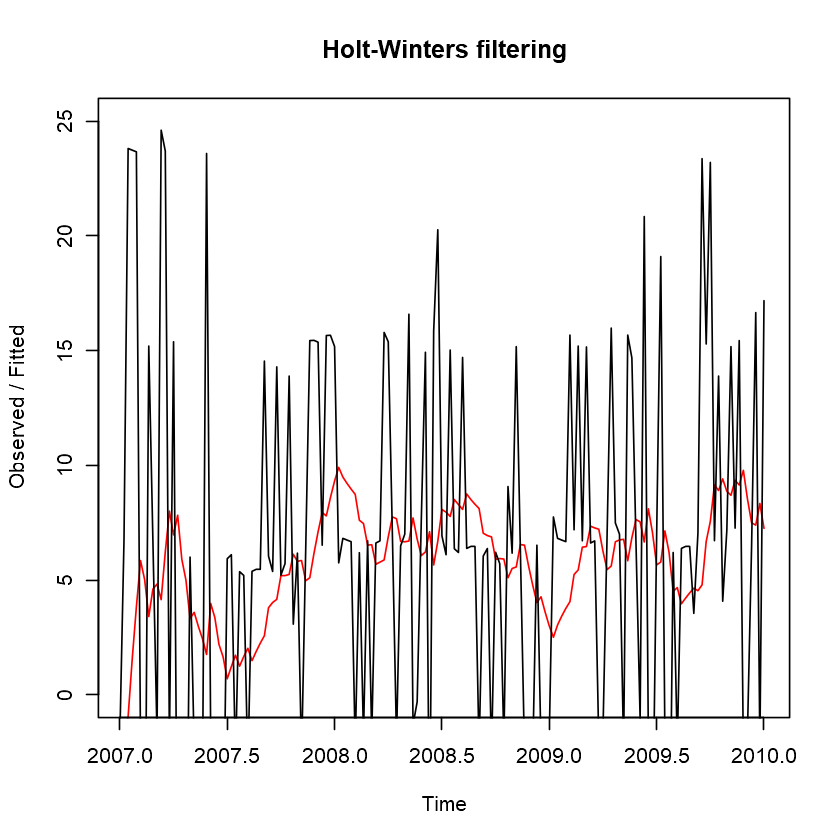

In [35]:
## Holt Winters Exponential Smoothing & Plot
tsSM3_HW070809 <- HoltWinters(tsSM3_070809Adjusted, beta=FALSE, gamma=FALSE)
plot(tsSM3_HW070809, ylim = c(0, 25))

In [ ]:
## HoltWinters forecast & plot
tsSM3_HW070809for <- forecast(tsSM3_HW070809, h=25)
plot(tsSM3_HW070809for, ylim = c(0, 20), ylab= "Watt-Hours", xlab="Time - Sub-meter 3")

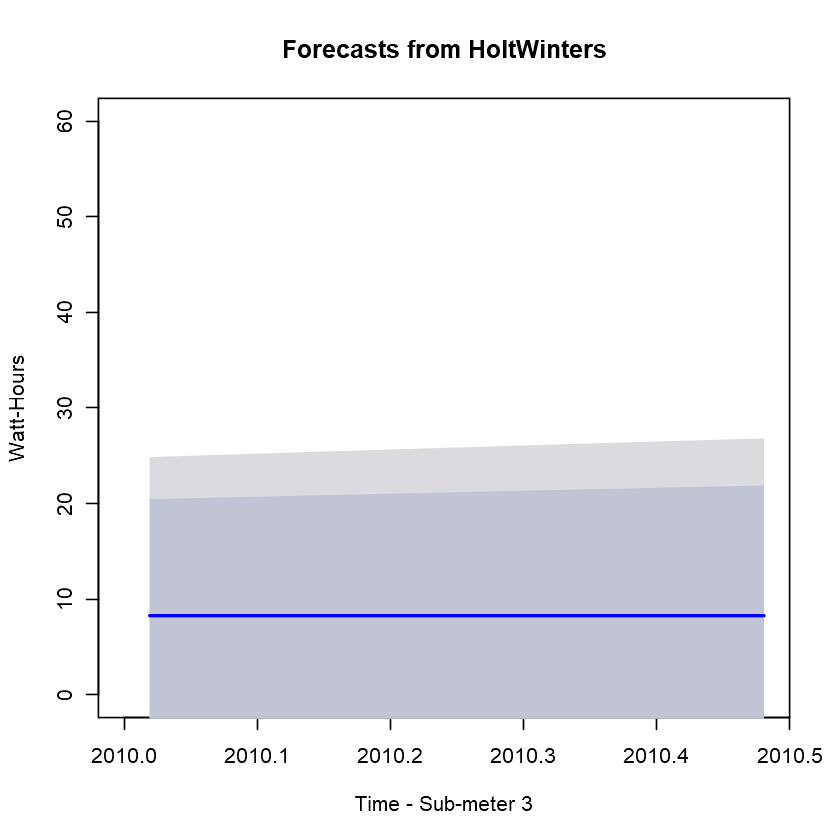

In [42]:
## Forecast HoltWinters with diminished confidence levels
tsSM3_HW070809forC <- forecast(tsSM3_HW070809, h=25, level=c(85,95))
## Plot only the forecasted area
plot(tsSM3_HW070809forC, ylim = c(0, 60), ylab= "Watt-Hours", xlab="Time - Sub-meter 3", start(2010))

This is an example how we could predict time forecasting using HoltWinters function.